In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

In [2]:
Zero = np.array([[1], [0]])
One = np.array([[0], [1]])

P0 = np.dot(Zero, Zero.T)
P1 = np.dot(One, One.T)

Hadamard = 1./np.sqrt(2) * np.array([[1, 1],
                                     [1, -1]])

def ket(i, n):
    r = np.zeros((2**n,))
    r[i] = 1
    return r

def otimes(*args):
    result = np.array([[1.0]])
    for arg in args:
        result = np.kron(result, arg)
    return result

def hadamard_test_operator(U):
    # A Hadamard on Q0
    # Controlled U gate on Q[1:n]
    # A Hadamard on Q0
    T =           otimes(Hadamard, np.eye(4))
    T = np.dot(T, otimes(P0, np.eye(4)) + otimes(P1, U))
    T = np.dot(T, otimes(Hadamard, np.eye(4)))

    return T

def measure1qbis(psi):
    # measurment matrices
    P_b0 = otimes(P0, np.eye(4))
    P_b1 = otimes(P1, np.eye(4))

    # measurment probabilities
    p_0 = np.round(np.square(np.linalg.norm(np.dot(P_b0, psi))), 6)
    p_1 = np.round(np.square(np.linalg.norm(np.dot(P_b1, psi))), 6)
    
    return p_0, p_1

**SWAP operator**

In [3]:
S = np.outer(ket(0,2), ket(0,2)) + \
    np.outer(ket(1,2), ket(2,2)) + \
    np.outer(ket(2,2), ket(1,2)) + \
    np.outer(ket(3,2), ket(3,2))

**Hadamard on Q0, then controlled swap on Q1 and Q2, then Hadamard on Q0**

In [4]:
T = hadamard_test_operator(S)

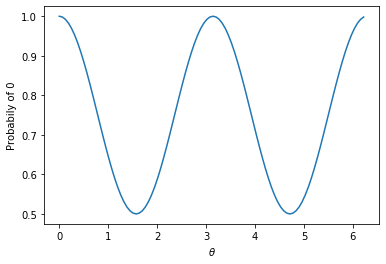

In [6]:
Ang = []
Prob_0 = []

for theta in range(100):
    theta /= 100
    psi_1 = Zero
    psi_2 = np.cos(2*np.pi*theta) * Zero + \
            np.sin(2*np.pi*theta) * One

    psi = np.dot(T, otimes(Zero, psi_1, psi_2))

    p_0, p_1 = measure1qbis(psi)
    
    Ang.append(theta*2*np.pi)
    Prob_0.append(p_0)

plt.plot(Ang, Prob_0)
plt.xlabel('$\\theta$')
plt.ylabel('Probabily of 0')
plt.show()